In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)

In [438]:
## Players features dataset
df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')
df.head()

/var/folders/8r/k5yvmgxd5674477xypwpv4lw0000gn/T/ipykernel_31765/3729246849.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [439]:
picked_first_round = df[df['pick']<=30]
picked_first_round.groupby('year').count()[['pick']].transpose()

year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
pick,64,62,58,56,50,45,45,45,51,47,40,35,25


In [440]:
df['pick'] = df['pick'].fillna(0)

df = df[df['pick']<=30]

df['first_round_drafted'] = np.where((df['pick']<=30) & (df['pick']>0), 1, 0)

df = df.drop('pick', axis=1)

In [441]:
df.first_round_drafted.value_counts()

first_round_drafted
0    59626
1      623
Name: count, dtype: int64

In [442]:
df = df.rename(columns = {'Unnamed: 64' : 'role'})
df = df.drop('Unnamed: 65', axis=1)

<AxesSubplot:>

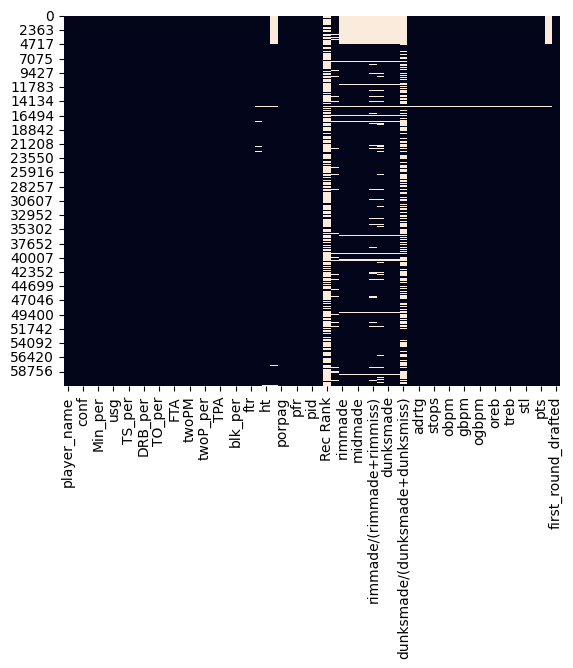

In [443]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

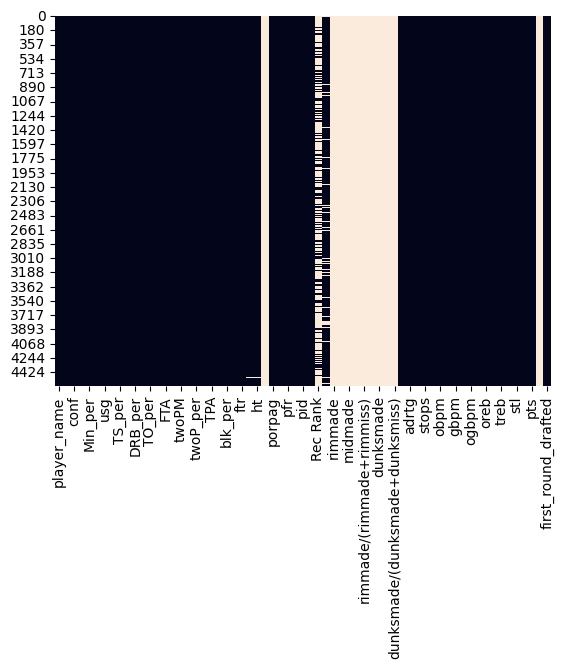

In [444]:
df_2009 = df[df.year == 2009]
sns.heatmap(df_2009.isnull(), cbar=False)

<AxesSubplot:>

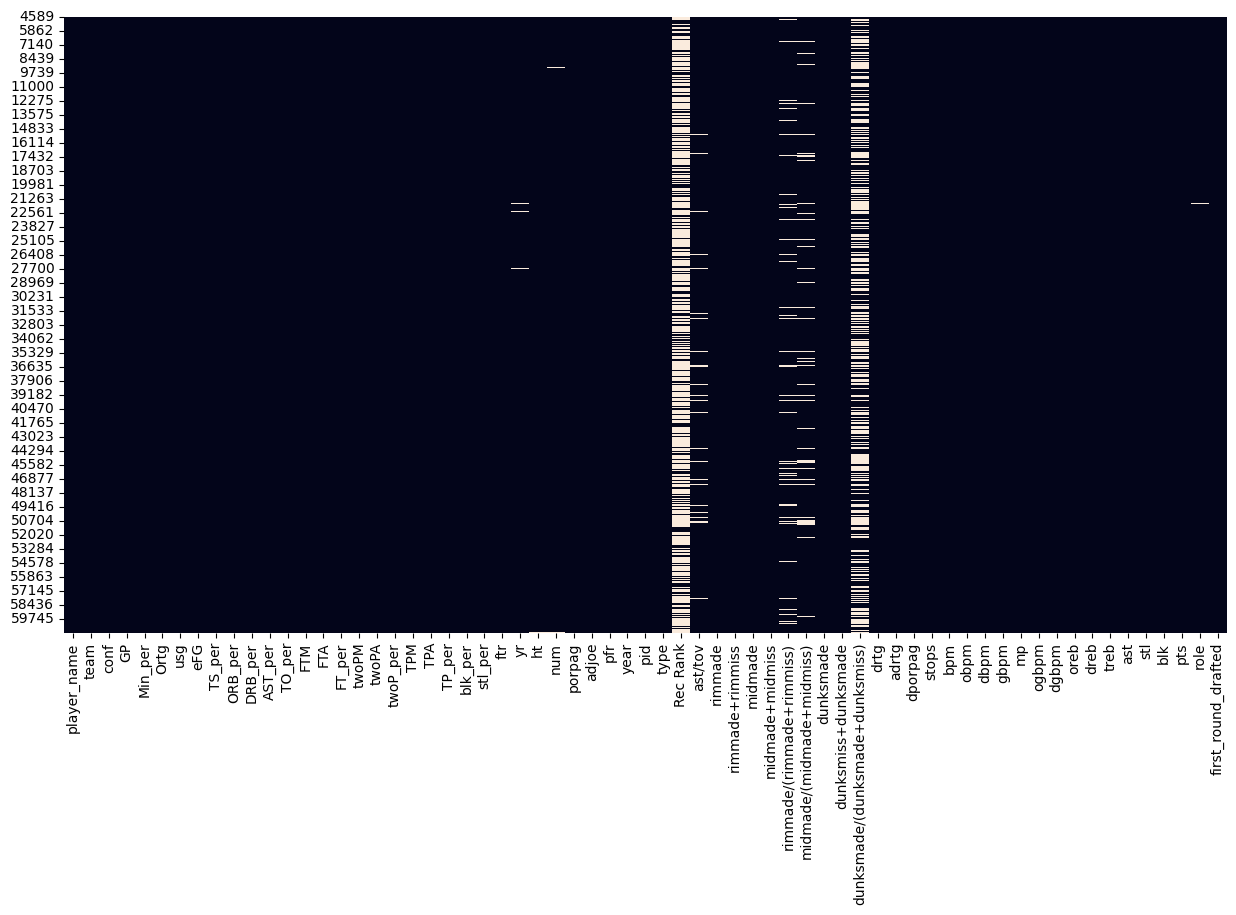

In [445]:
df = df[df.year != 2009]
df = df.dropna(thresh=len(df.columns) - 9)
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)

In [446]:
df = df.drop(["Rec Rank", "dunksmade/(dunksmade+dunksmiss)"], axis=1)

In [447]:
df.columns[df.isnull().any()].tolist()

['yr',
 'ht',
 'num',
 'ast/tov',
 'rimmade',
 'rimmade+rimmiss',
 'midmade',
 'midmade+midmiss',
 'rimmade/(rimmade+rimmiss)',
 'midmade/(midmade+midmiss)',
 'dunksmade',
 'dunksmiss+dunksmade',
 'role']

In [448]:
df.yr.value_counts()

yr
Jr      14503
Fr      14085
So      12758
Sr      12489
57.1        1
0           1
42.9        1
Name: count, dtype: int64

In [449]:
df = df[df['yr'].isin(["Fr", "So", "Jr", "Sr"])]
df['yr'] = df['yr'].map({"Fr": 1, "So": 2, "Jr": 3, "Sr": 4})

In [450]:
df.ht.value_counts()

ht
7-Jun     5448
8-Jun     5333
4-Jun     5219
5-Jun     5209
6-Jun     4975
3-Jun     4967
2-Jun     4476
9-Jun     3917
1-Jun     3337
Jun-00    2805
10-Jun    2464
11-May    1383
10-May    1240
11-Jun    1091
Jul-00     648
9-May      540
8-May      215
1-Jul      200
7-May       88
2-Jul       84
3-Jul       39
6-May       36
-           27
Apr-00      16
4-Jul       12
6-Jul        7
5-May        6
2-May        4
4-May        4
5-Jul        3
0            1
1-May        1
3-May        1
5-Apr        1
Name: count, dtype: int64

In [451]:
def split_letters_numbers(s):
    letters = ''.join(re.findall("[a-zA-Z]+", s))
    numbers = ''.join(re.findall("[0-9]+", s))
    return letters, numbers

df['ht'] = df['ht'].fillna(method='ffill')

df[['ht_month', 'ht_day']] = df['ht'].astype(str).apply(lambda x: pd.Series(split_letters_numbers(x)))

In [452]:
df.num.value_counts()

num
1.0      2548
5.0      2415
2.0      2384
3.0      2379
0.0      2183
         ... 
99.0        2
99          1
4A          1
31/24       1
26.0        1
Name: count, Length: 77, dtype: int64

In [453]:
def get_number(s):
    return re.findall(r'[A-Za-z]+|\d+', s)[0]

df['num'] = df['num'].astype(str).apply(lambda x: pd.Series(get_number(x)))

In [454]:
df['num'] = pd.to_numeric(df['num'], errors='coerce')

In [455]:
df = df.dropna(subset=['num'])

In [456]:
df['role'].value_counts()

role
Wing G        12190
PF/C           8846
Combo G        8812
C              7776
Scoring PG     5691
Wing F         4814
Stretch 4      3124
Pure PG        2453
Name: count, dtype: int64

In [457]:
df.role.isnull().sum()

5

In [458]:
df = df.dropna(subset=['role'])

In [459]:
df = df.fillna(0)

<AxesSubplot:>

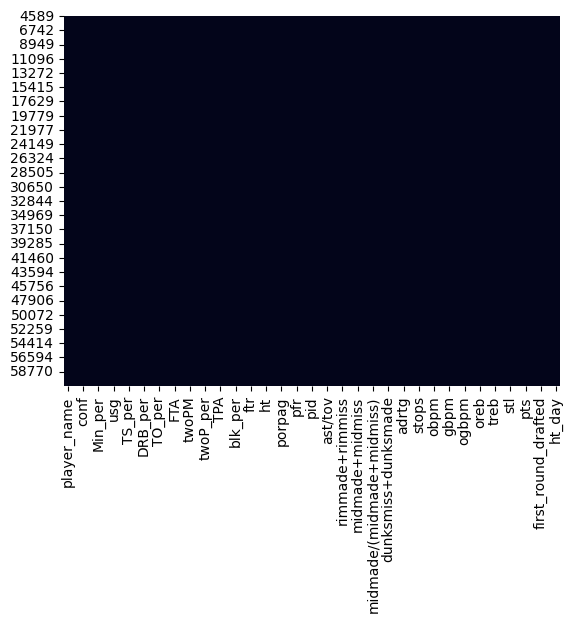

In [460]:
sns.heatmap(df.isnull(), cbar=False)

In [461]:
df.isnull().sum().sum()

0

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53706 entries, 4589 to 61057
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_name                53706 non-null  object 
 1   team                       53706 non-null  object 
 2   conf                       53706 non-null  object 
 3   GP                         53706 non-null  int64  
 4   Min_per                    53706 non-null  float64
 5   Ortg                       53706 non-null  float64
 6   usg                        53706 non-null  float64
 7   eFG                        53706 non-null  float64
 8   TS_per                     53706 non-null  float64
 9   ORB_per                    53706 non-null  float64
 10  DRB_per                    53706 non-null  float64
 11  AST_per                    53706 non-null  float64
 12  TO_per                     53706 non-null  float64
 13  FTM                        53706 non-null  int64

In [463]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [464]:
len(df.columns) == len(numerical_cols) + len(object_cols)

True

In [465]:
object_cols

['player_name', 'team', 'conf', 'ht', 'type', 'role', 'ht_month', 'ht_day']

In [466]:
#maybe frequency encoding for team?
#df = df.drop(['player_name', 'team', 'conf', 'ht', 'type'], axis=1)
df = df.drop(['player_name', 'conf', 'ht', 'type'], axis=1)

In [503]:
#frequency encoding + onehot for most popular wont work since too many duplicates, one hot directly, but creates a lot of new columns
from collections import Counter
frequency = Counter(df['team'].value_counts().tolist())
elements_more_than_once = [number for number, count in frequency.items() if count > 1]

same_vc = []

team_value_counts = df['team'].value_counts().to_dict()
teams = df.team.unique().tolist()
values_set = set(team_value_counts.values())
 
for team in teams:
    if team_value_counts[team] in elements_more_than_once:
        same_vc.append(team)

len(same_vc)

334

In [504]:
df = df.drop('team', axis=1)

In [507]:
df.ht_month.unique().tolist()

['Jun', 'May', 'Jul', 'Apr', '']

In [508]:
df = df[df['ht_month'] != ""]

In [509]:
df.ht_day.unique().tolist()

['3', '2', '5', '4', '11', '7', '6', '10', '8', '9', '00', '1']

In [510]:
one_hot_cols = ['role', 'ht_month', 'ht_day']

In [511]:
for col in numerical_cols:
    num_unique = df[col].nunique()
    if num_unique <= 25:
        print(f"{col}: {num_unique}")

yr: 4
year: 12
first_round_drafted: 2


In [512]:
df.yr.value_counts()
#leave like this since ordinal structure

yr
3    14465
1    14017
2    12732
4    12466
Name: count, dtype: int64

In [513]:
df.year.value_counts()

year
2021    4612
2017    4542
2020    4530
2016    4516
2019    4510
2018    4502
2015    4496
2014    4462
2010    4435
2013    4364
2011    4360
2012    4351
Name: count, dtype: int64

In [514]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [515]:
bol_cols = df.select_dtypes(include=['bool']).columns.tolist()

In [516]:
df[bol_cols] = df[bol_cols].apply(lambda x: x.astype(int))

In [517]:
df = df.reset_index(drop=True)
df.shape

(53680, 78)

In [518]:
year_cols = [col for col in df.columns if col.startswith('year_')]

In [519]:
df_2021 = df[df['year']==2021]
df_2021 = df_2021.drop('year', axis=1)

#find a way to keep this data?
df = df[df['year']!=2021]
df = df.drop('year', axis=1)

In [520]:
print(df_2021.shape)
print(df.shape)

(4612, 77)
(49068, 77)


In [536]:
from sklearn.model_selection import train_test_split

df = df.sample(12500, random_state=42)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['first_round_drafted'])

In [541]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = df.columns.tolist()
test_df = df_2021

train_df[cols] = scaler.fit_transform(train_df[cols])
val_df[cols] = scaler.transform(val_df[cols])
test_df[cols] = scaler.transform(df_2021[cols])

X_train = train_df.drop(['first_round_drafted'], axis=1)
y_train = train_df['first_round_drafted']

X_val = val_df.drop(['first_round_drafted'], axis=1)
y_val = val_df['first_round_drafted']

X_test = test_df.drop(['first_round_drafted'], axis=1)
y_test = test_df['first_round_drafted']


print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(10000, 76)
(10000,)
(2500, 76)
(2500,)
(4612, 76)
(4612,)


In [542]:
import lightgbm as lgb
gbm = lgb.LGBMRanker()

In [543]:
query_train = [X_train.shape[0]]
query_val = [X_val.shape[0]]

In [544]:
gbm.fit(X_train, y_train, group=query_train,
        eval_set=[(X_val, y_val)], eval_group=[query_val],
        eval_at=[5, 10, 20])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11951
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 76
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRanker()

In [545]:
predicted_proba = gbm.predict(X_test)

pred_proba_df = pd.DataFrame(predicted_proba)
pred_proba_df.columns = ['pred-prob']

df_2021 = df_2021.reset_index()

merged_df = df_2021.merge(pred_proba_df, left_index=True, right_index=True)

selected_by_model = merged_df.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0.0    30
Name: count, dtype: int64